In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

In [2]:
raw_data = pd.read_excel('./Public data Compt/data/제10회 산업통상자원부 공공데이터활용 BI공모전_빅데이터 분석 과제 1_데이터.xlsx', sheet_name='2. raw data')

In [3]:
df = raw_data.copy()
df

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


## EDA(Exploratory Data Analysis) 

- 수출 금액 예측에 앞서 제공된 데이터들을 알아보고 시각화 해보고자 한다.

In [4]:
# 단위가 너무 커서 Million $로 단위를 변경한 후, 소수점 셋 째자리($1000)까지만 표현하였다.

def get_million(x):
    million = 1000000
    return x/million

for col in df.columns:
    if col == '기간':
        continue
    df[col] = round(df[col].apply(lambda x: get_million(x)), 3)

df
    

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162.425,1235.215,2609.788,109.743,782.349,1551.722
1,2000-02-01,12676.042,1273.117,2554.310,112.395,823.990,1518.845
2,2000-03-01,14429.703,1437.377,2946.821,150.135,911.648,1783.565
3,2000-04-01,13522.040,1366.877,2698.030,169.146,863.243,1582.708
4,2000-05-01,14636.755,1663.241,3167.181,169.412,887.081,1671.040
...,...,...,...,...,...,...,...
259,2021-08-01,53165.104,13881.328,7704.224,4850.338,3415.829,2522.980
260,2021-09-01,55913.862,14291.980,7983.934,5101.701,3852.088,2541.018
261,2021-10-01,55660.373,14415.867,8066.783,4904.971,2739.663,2614.684
262,2021-11-01,60330.542,15272.549,8133.640,5478.297,3232.583,2813.250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기간         264 non-null    datetime64[ns]
 1   한국 수출금액    264 non-null    float64       
 2   한국의대중국수출   264 non-null    float64       
 3   한국의대미국수출   264 non-null    float64       
 4   한국의대베트남수출  264 non-null    float64       
 5   한국의대홍콩수출   264 non-null    float64       
 6   한국의대일본수출   264 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.6 KB


#### - Column별 분석 및 결측치 조사

In [6]:
for col in df.columns:
    if col != '기간':
        description = df[col].describe()
        isnullsum = df[col].isnull().sum()
        print(f'{col} column의 description과 null값의 개수는 다음과 같다. \n{description}\n null값 개수 : {isnullsum}\n')
    else:
        isnullsum = df[col].isnull().sum()
        print(f'{col} column의 null값의 개수는 다음과 같다. \n null값 개수 : {isnullsum}\n')


기간 column의 null값의 개수는 다음과 같다. 
 null값 개수 : 0

한국 수출금액 column의 description과 null값의 개수는 다음과 같다. 
count      264.000000
mean     35232.517625
std      13373.323529
min      11023.037000
25%      23252.280000
50%      39397.020000
75%      46312.551750
max      60734.117000
Name: 한국 수출금액, dtype: float64
 null값 개수 : 0

한국의대중국수출 column의 description과 null값의 개수는 다음과 같다. 
count      264.000000
mean      8373.894644
std       4046.707431
min       1235.215000
25%       4910.558500
50%       9678.116500
75%      11657.769250
max      15342.563000
Name: 한국의대중국수출, dtype: float64
 null값 개수 : 0

한국의대미국수출 column의 description과 null값의 개수는 다음과 같다. 
count     264.000000
mean     4586.592011
std      1478.022094
min      2267.664000
25%      3380.042000
50%      4392.580000
75%      5726.193250
max      8787.542000
Name: 한국의대미국수출, dtype: float64
 null값 개수 : 0

한국의대베트남수출 column의 description과 null값의 개수는 다음과 같다. 
count     264.000000
mean     1637.289409
std      1568.663798
min        94.831000
25%       300

- 수출금액 데이터의 전체적인 추이를 파악한다

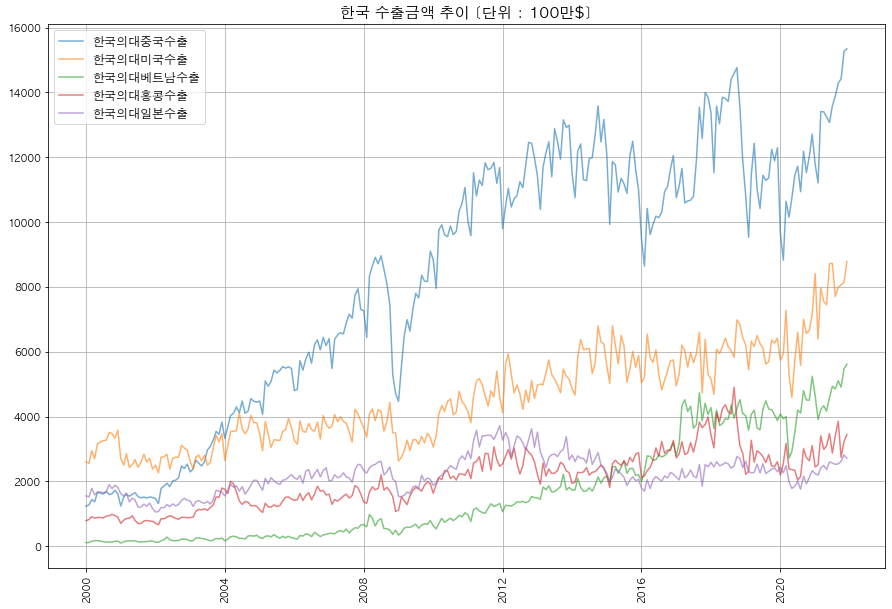

In [7]:
plt.figure(figsize=(15,10))
plt.title('한국 수출금액 추이 [단위 : 100만$]', fontsize=15)
for col in df.columns:
    if col == '기간' or col == '한국 수출금액':
        continue
    plt.plot(df['기간'], df[col], "-", alpha = .6, label = str(col))
    
plt.grid()
plt.legend(fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 상관 분석(Correlation analysis)

- 과제에서 지정한 독립변수 와 타겟(종속)변수 모두 수치형 자료이므로 상관 분석을 실시해보는 것이 적합하다고 판단된다.

## 예측 모델 선택 전 검증

- 제공된 수출금액 데이터는 시간에 흐름에 따라 수츨 금액을 저장한 시계열 데이터 이므로, 특정 시계열 예측 모델에 효율적인지를 파악하기 위해 데이터의 통계적 특성을 알아본다.

자기상관함수(Autocorrelation Fucntion, ACF) : ACF는 y_t와 y_t+k 사이에 correlation을 측정하는 것이다. 즉,  y_t와 y_t+k가 얼마나 관계가 있는 지를 측정한다.

편자기상관함수(Partial Autocorrelation Fucntion, PACF) : y_t와 y_t+k와의 correlation을 측정하는 것은 ACF와 동일하나, t와 t+k 사이에 다른 y값들의 영향력을 배제하고 측정한다.

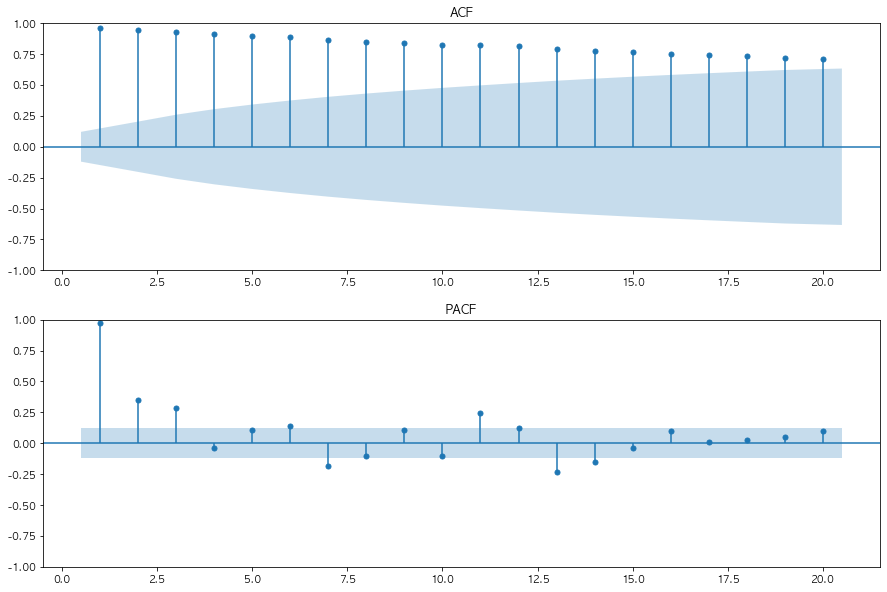

그래프를 해석해보면, y축의 값들은 ACF, PACF를 수치화한 것이고, x축은 몇개 전의 값에 대한 것인지 말해준다.
예를 들어 x값이 2면 2개 전의 값을 의미한다. 그리고 실핀 처럼 생긴 bar들이 있는데, 이게 파란색 상자 안에 들어가게 되면 그 값은 통계적으로 significant하지 않다고 본다.
ACF 그래프의 경우, 점점 작아지면 AR(p) 모델 혹은 ARMA(p,q) 모델에 적합하고 첫 값으로부터 q개 뒤에 끊기면 MA(q)모델에 적합하며


In [17]:
import statsmodels.graphics.tsaplots as sgt

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df['한국 수출금액'], lags = 20, zero = False, ax=ax1)
ax1.set_title('ACF')


sgt.plot_pacf(df['한국 수출금액'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title('PACF')

plt.show()
print('그래프를 해석해보면, y축의 값들은 ACF, PACF를 수치화한 것이고, x축은 몇개 전의 값에 대한 것인지 말해준다.\n예를 들어 x값이 2면 2개 전의 값을 의미한다. 그리고 실핀 처럼 생긴 bar들이 있는데, 이게 파란색 상자 안에 들어가게 되면 그 값은 통계적으로 significant하지 않다고 본다.')
print('ACF 그래프의 경우, 점점 작아지면 AR(p) 모델 혹은 ARMA(p,q) 모델에 적합하고 첫 값으로부터 q개 뒤에 끊기면 MA(q)모델에 적합하며')

## 한국 수출금액 예측